# Project - Estimating the purpose of the product in the image
## Author: Erdem Tosun


### ======================================
### Section 1: Installing the Required Libraries
### ======================================

In [49]:
# Gerekli kütüphaneler
import pandas as pd
from collections import Counter


### ======================================
###  Section 2: Loading the Data Set and Preprocessing
### ======================================



In [50]:
# CSV dosyasını oku
df = pd.read_csv("data/All Pet Supplies.csv")

# İlk bakış
df.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Meat Up Chicken Flavour Real Chicken Dog Biscu...,pet supplies,All Pet Supplies,https://m.media-amazon.com/images/I/81eKrwo4VK...,https://www.amazon.in/Meatup-Chicken-Flavour-B...,4.2,"36,349",₹328,₹349
1,"Purepet Ocean Fish Adult Dry Cat Food, 1.2kg",pet supplies,All Pet Supplies,https://m.media-amazon.com/images/I/71N9qXb6rC...,https://www.amazon.in/Purepet-Adult-Food-Ocean...,4.2,"14,162",₹179,₹239
2,"Purepet Mackerel Adult Dry Cat Food, 1.2 kg",pet supplies,All Pet Supplies,https://m.media-amazon.com/images/I/71CZOKVVeV...,https://www.amazon.in/Purepet-Mackerel-Adult-C...,4.2,"10,211",₹185,₹239
3,"Drools Chicken and Egg Adult Dry Dog Food, 3 k...",pet supplies,All Pet Supplies,https://m.media-amazon.com/images/I/71NrhVNqHh...,https://www.amazon.in/Drools-Chicken-Adult-Foo...,4.2,"13,418",₹615,₹699
4,"Pedigree Adult Dry Dog Food, Chicken & Vegetab...",pet supplies,All Pet Supplies,https://m.media-amazon.com/images/I/61Gm70FJSx...,https://www.amazon.in/Pedigree-Adult-Food-Chic...,4.4,"19,718",₹696,₹810


In [51]:
# Lowercase
df['name_clean'] = df['name'].str.lower().str.replace(r'[^a-z\s]', '', regex=True)

# Controlling
df[['name', 'name_clean']].head()

,name,name_clean
0,Meat Up Chicken Flavour Real Chicken Dog Biscu...,meat up chicken flavour real chicken dog biscu...
1,"Purepet Ocean Fish Adult Dry Cat Food, 1.2kg",purepet ocean fish adult dry cat food kg
2,"Purepet Mackerel Adult Dry Cat Food, 1.2 kg",purepet mackerel adult dry cat food kg
3,"Drools Chicken and Egg Adult Dry Dog Food, 3 k...",drools chicken and egg adult dry dog food kg ...
4,"Pedigree Adult Dry Dog Food, Chicken & Vegetab...",pedigree adult dry dog food chicken vegetable...


In [52]:
# Merge all words
all_words = " ".join(df['name_clean']).split()
word_counts = Counter(all_words)
common_words = word_counts.most_common(30)

# Show
for word, count in common_words:
    print(f"{word}: {count}")

for: 379
dog: 288
and: 162
pet: 144
with: 140
food: 125
dogs: 118
cat: 110
of: 98
aquarium: 95
kg: 94
fish: 91
chicken: 84
pack: 82
g: 81
pets: 64
adult: 60
toy: 58
dry: 57
small: 56
bird: 55
cats: 54
ml: 52
puppies: 51
puppy: 50
water: 49
large: 45
collar: 44
natural: 43
chew: 39


In [53]:
# Matching Keywords to priority words
category_keywords = {
    'dog': 'dog',
    'cat': 'cat',
    'fish': 'fish',
    'bird': 'bird',
    'toy': 'toy',
    'collar': 'collar',
    'treat': 'treat',
    'chew': 'chew',
    'aquarium': 'fish'
}

# Assign Category
def assign_category(name):
    for keyword, category in category_keywords.items():
        if keyword in name:
            return category
    return 'other'

df['category'] = df['name_clean'].apply(assign_category)
# Category Distrubition
df['category'].value_counts()

category
dog       298
fish      109
other      99
cat        78
bird       52
treat       4
chew        3
toy         3
collar      2
Name: count, dtype: int64

### Merging Images and Text

In [54]:
# List Image Urls
df.columns[df.columns.str.contains("image", case=False, na=False)].tolist()

df[['image']].dropna().head()


,image
0,https://m.media-amazon.com/images/I/81eKrwo4VK...
1,https://m.media-amazon.com/images/I/71N9qXb6rC...
2,https://m.media-amazon.com/images/I/71CZOKVVeV...
3,https://m.media-amazon.com/images/I/71NrhVNqHh...
4,https://m.media-amazon.com/images/I/61Gm70FJSx...


#### Download Images

In [ ]:
import os
import requests
from PIL import Image
from io import BytesIO

image_column = "image" 
os.makedirs("images", exist_ok=True)

for i, val in enumerate(df[image_column].dropna().head(100)):
    try:
        if isinstance(val, str) and val.strip().startswith('['):
            url = eval(val)[0]
        else:
            url = val

        response = requests.get(url, timeout=5)
        img = Image.open(BytesIO(response.content)).convert('RGB')
        img.save(f"images/{i}.jpg")

    except Exception as e:
        print(f"{i}: Error - {e}")

In [56]:
# Just Downloadable
df_filtered = df[df.index.isin([int(f.split('.')[0]) for f in os.listdir('images') if f.endswith('.jpg')])]

# Choose columns
df_final = df_filtered[['name', 'name_clean', 'category']].copy()
df_final['image_path'] = df_final.index.map(lambda x: f"images/{x}.jpg")

# Train Dataset
df_final.head()


,name,name_clean,category,image_path
0,Meat Up Chicken Flavour Real Chicken Dog Biscu...,meat up chicken flavour real chicken dog biscu...,dog,images/0.jpg
1,"Purepet Ocean Fish Adult Dry Cat Food, 1.2kg",purepet ocean fish adult dry cat food kg,cat,images/1.jpg
2,"Purepet Mackerel Adult Dry Cat Food, 1.2 kg",purepet mackerel adult dry cat food kg,cat,images/2.jpg
3,"Drools Chicken and Egg Adult Dry Dog Food, 3 k...",drools chicken and egg adult dry dog food kg ...,dog,images/3.jpg
4,"Pedigree Adult Dry Dog Food, Chicken & Vegetab...",pedigree adult dry dog food chicken vegetable...,dog,images/4.jpg


### ======================================
###  Section 3: Model Evaluation
### ======================================



In [ ]:
pip install torch torchvision transformers scikit-learn pandas pillow


In [58]:
from torch.utils.data import Dataset
from PIL import Image
from transformers import BertTokenizer
import torch
from torchvision import transforms

# Categories to Label Encoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_final['label'] = label_encoder.fit_transform(df_final['category'])

# Image Transform
image_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Multimodal Dataset 
class ProductDataset(Dataset):
    def __init__(self, dataframe):
        self.data = dataframe.reset_index(drop=True)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.loc[idx]

        # Görsel
        image = Image.open(row['image_path']).convert('RGB')
        image_tensor = image_transform(image)

        # Metin
        text = row['name_clean']
        encoded = tokenizer(text, truncation=True, padding='max_length', max_length=32, return_tensors='pt')
        input_ids = encoded['input_ids'].squeeze()
        attention_mask = encoded['attention_mask'].squeeze()

        # Label
        label = torch.tensor(row['label'])

        return image_tensor, input_ids, attention_mask, label


### Classifier

In [59]:
import torch.nn as nn
from torchvision.models import resnet18
from transformers import BertModel

class MultimodalClassifier(nn.Module):
    def __init__(self, num_classes):
        super(MultimodalClassifier, self).__init__()

        # Image: ResNet (pretrained)
        self.cnn = resnet18(pretrained=True)
        self.cnn.fc = nn.Identity()  # Drop last layer - 512 dimension feature

        # Text: BERT (pretrained)
        self.bert = BertModel.from_pretrained("bert-base-uncased")
        self.text_fc = nn.Linear(self.bert.config.hidden_size, 256)

        # Merge and classify
        self.classifier = nn.Sequential(
            nn.Linear(512 + 256, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes)
        )

    def forward(self, image, input_ids, attention_mask):
        # Image Features
        img_feat = self.cnn(image)  # [batch, 512]

        # Text Features
        text_outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        text_feat = self.text_fc(text_outputs.pooler_output)  # [batch, 256]

        # Merged
        combined = torch.cat((img_feat, text_feat), dim=1)

        # Classified
        out = self.classifier(combined)
        return out


#### ======================================
####  Section 3.5: Feature Engineering & Visualization of Features
#### ======================================



C:\Users\erdem\AppData\Local\Temp\ipykernel_9084\129328212.py:45: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
D:\Projects\MLP\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


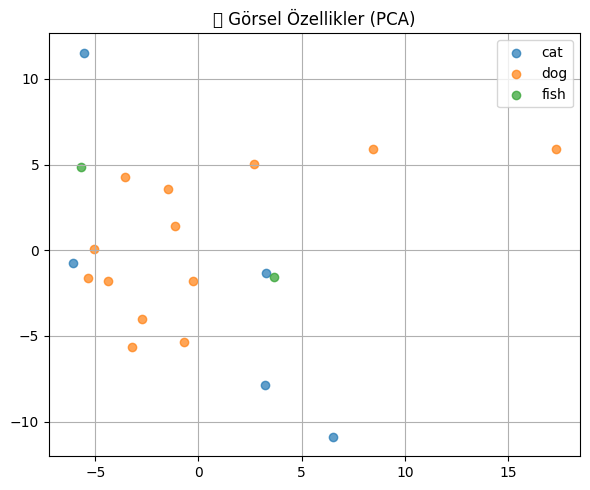

C:\Users\erdem\AppData\Local\Temp\ipykernel_9084\129328212.py:45: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
D:\Projects\MLP\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


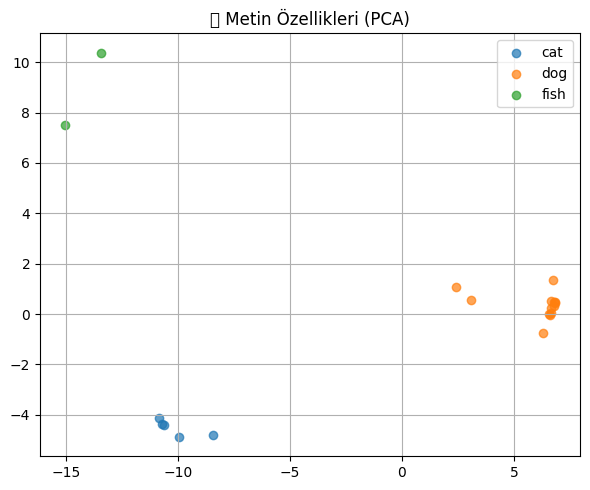

C:\Users\erdem\AppData\Local\Temp\ipykernel_9084\129328212.py:45: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
D:\Projects\MLP\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


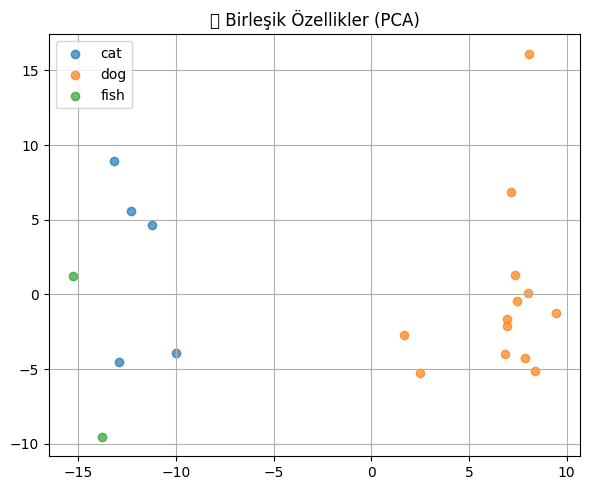

In [61]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

model.eval()
image_feats, text_feats, combined_feats, labels_list = [], [], [], []

with torch.no_grad():
    for images, input_ids, attention_mask, labels in val_loader:
        images, input_ids, attention_mask = images.to(device), input_ids.to(device), attention_mask.to(device)
        # Image Feature
        img_feat = model.cnn(images)
        # Text Feature
        text_outputs = model.bert(input_ids=input_ids, attention_mask=attention_mask)
        text_feat = model.text_fc(text_outputs.pooler_output)
        # Merge
        combined = torch.cat((img_feat, text_feat), dim=1)

        # Add List
        image_feats.append(img_feat.cpu())
        text_feats.append(text_feat.cpu())
        combined_feats.append(combined.cpu())
        labels_list.extend(labels)

# Merge
image_feats = torch.cat(image_feats).numpy()
text_feats = torch.cat(text_feats).numpy()
combined_feats = torch.cat(combined_feats).numpy()
labels_np = np.array(labels_list)

# 2D with PCA
pca_img = PCA(n_components=2).fit_transform(image_feats)
pca_text = PCA(n_components=2).fit_transform(text_feats)
pca_comb = PCA(n_components=2).fit_transform(combined_feats)

# Plot
def plot_pca(data, labels, title):
    plt.figure(figsize=(6, 5))
    for label in np.unique(labels):
        idx = labels == label
        plt.scatter(data[idx, 0], data[idx, 1], label=class_names[label], alpha=0.7)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Show
plot_pca(pca_img, labels_np, "🖼️ Görsel Özellikler (PCA)")
plot_pca(pca_text, labels_np, "📝 Metin Özellikleri (PCA)")
plot_pca(pca_comb, labels_np, "🔗 Birleşik Özellikler (PCA)")


### ======================================
###  Section 4: Model Evaluation (Cont.)
### ======================================



In [37]:
from torch.utils.data import DataLoader, random_split
import torch.optim as optim
import torch.nn as nn
import torch

# Split dataset
dataset = ProductDataset(df_final)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_set, val_set = random_split(dataset, [train_size, val_size])

# Load Data
train_loader = DataLoader(train_set, batch_size=16, shuffle=True)
val_loader = DataLoader(val_set, batch_size=16)

# Model, optimizer, loss
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MultimodalClassifier(num_classes=len(label_encoder.classes_)).to(device)
optimizer = optim.Adam(model.parameters(), lr=2e-5)
criterion = nn.CrossEntropyLoss()


D:\Projects\MLP\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
D:\Projects\MLP\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\erdem/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth


100%|█████████████████████████████████████████████████████████████████████████████| 44.7M/44.7M [00:02<00:00, 22.0MB/s]
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


#### Train Function

In [62]:
def train_epoch(model, dataloader, optimizer, criterion):
    model.train()
    total_loss, total_correct = 0, 0

    for images, input_ids, attention_mask, labels in dataloader:
        images, input_ids, attention_mask, labels = images.to(device), input_ids.to(device), attention_mask.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images, input_ids, attention_mask)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * images.size(0)
        total_correct += (outputs.argmax(1) == labels).sum().item()

    return total_loss / len(dataloader.dataset), total_correct / len(dataloader.dataset)

def evaluate(model, dataloader, criterion):
    model.eval()
    total_loss, total_correct = 0, 0

    with torch.no_grad():
        for images, input_ids, attention_mask, labels in dataloader:
            images, input_ids, attention_mask, labels = images.to(device), input_ids.to(device), attention_mask.to(device), labels.to(device)
            outputs = model(images, input_ids, attention_mask)
            loss = criterion(outputs, labels)

            total_loss += loss.item() * images.size(0)
            total_correct += (outputs.argmax(1) == labels).sum().item()

    return total_loss / len(dataloader.dataset), total_correct / len(dataloader.dataset)


#### Epoch and Training

In [63]:
for epoch in range(7):
    train_loss, train_acc = train_epoch(model, train_loader, optimizer, criterion)
    val_loss, val_acc = evaluate(model, val_loader, criterion)

    print(f"Epoch {epoch+1}:")
    print(f"  Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}")
    print(f"  Val   Loss: {val_loss:.4f} | Val   Acc: {val_acc:.4f}")


Epoch 1:
  Train Loss: 0.3038 | Train Acc: 1.0000
  Val   Loss: 0.4136 | Val   Acc: 0.9500
Epoch 2:
  Train Loss: 0.2557 | Train Acc: 1.0000
  Val   Loss: 0.3996 | Val   Acc: 0.9500
Epoch 3:
  Train Loss: 0.2448 | Train Acc: 1.0000
  Val   Loss: 0.3630 | Val   Acc: 0.9500
Epoch 4:
  Train Loss: 0.2241 | Train Acc: 1.0000
  Val   Loss: 0.3573 | Val   Acc: 0.9000
Epoch 5:
  Train Loss: 0.1872 | Train Acc: 1.0000
  Val   Loss: 0.2881 | Val   Acc: 1.0000
Epoch 6:
  Train Loss: 0.1738 | Train Acc: 1.0000
  Val   Loss: 0.2594 | Val   Acc: 1.0000
Epoch 7:
  Train Loss: 0.1417 | Train Acc: 1.0000
  Val   Loss: 0.2600 | Val   Acc: 1.0000


### ======================================
###  Section 5: Model Visualization
### ======================================



In [64]:
class_names = label_encoder.classes_


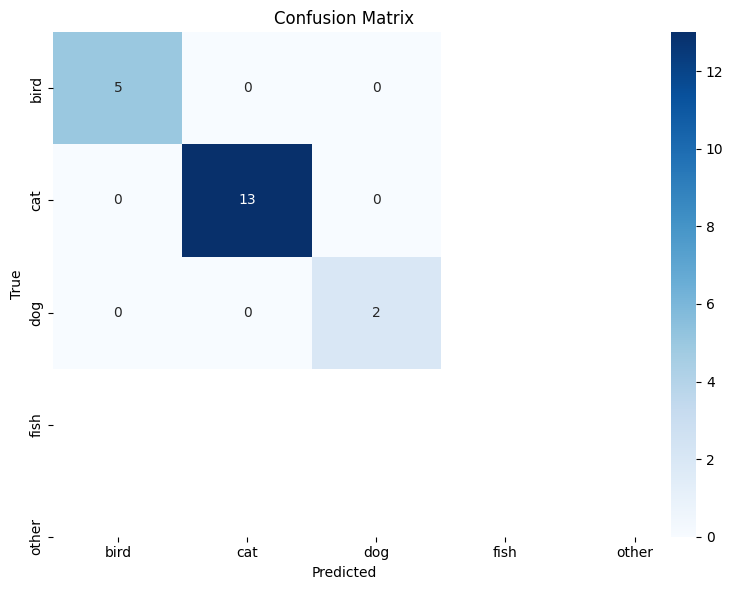


Classification Report:

              precision    recall  f1-score   support

         cat       1.00      1.00      1.00         5
         dog       1.00      1.00      1.00        13
        fish       1.00      1.00      1.00         2

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [65]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Get all preds
all_preds, all_labels = [], []

model.eval()
with torch.no_grad():
    for images, input_ids, attention_mask, labels in val_loader:
        images, input_ids, attention_mask = images.to(device), input_ids.to(device), attention_mask.to(device)
        outputs = model(images, input_ids, attention_mask)
        preds = outputs.argmax(1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.numpy())

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

from sklearn.utils.multiclass import unique_labels

# Real Class indexes
used_labels = unique_labels(all_labels, all_preds)
used_class_names = [class_names[i] for i in used_labels]

#Classification Report
print("\nClassification Report:\n")
print(classification_report(all_labels, all_preds, labels=used_labels, target_names=used_class_names))


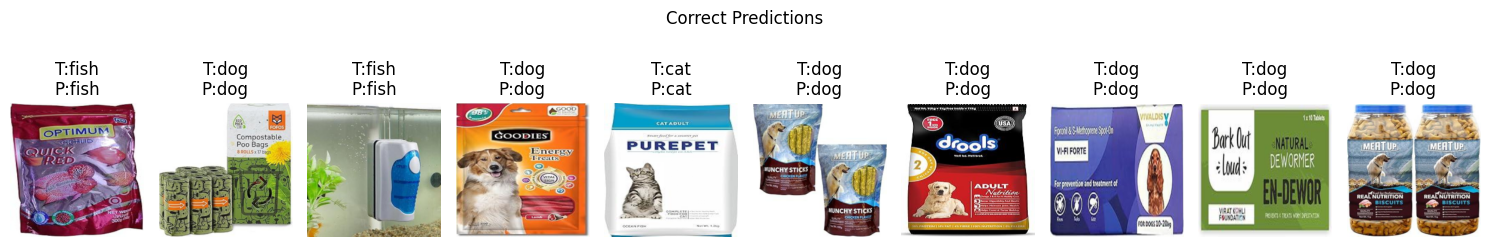

<Figure size 1500x300 with 0 Axes>

In [68]:
import matplotlib.pyplot as plt
import random

# Collect predictions
correct = []
wrong = []

for i in range(len(val_set)):
    image, input_ids, attention_mask, label = val_set[i]
    with torch.no_grad():
        image_batch = image.unsqueeze(0).to(device)
        input_ids = input_ids.unsqueeze(0).to(device)
        attention_mask = attention_mask.unsqueeze(0).to(device)
        output = model(image_batch, input_ids, attention_mask)
        pred = output.argmax(1).item()

    if pred == label.item():
        correct.append((i, image, label.item(), pred))
    else:
        wrong.append((i, image, label.item(), pred))

# Show
def show_examples(examples, title, n=5):
    plt.figure(figsize=(15, 3))
    for idx, (i, image, true, pred) in enumerate(random.sample(examples, min(n, len(examples)))):
        plt.subplot(1, n, idx + 1)
        plt.imshow(image.permute(1, 2, 0))  # [C,H,W] → [H,W,C]
        plt.axis('off')
        plt.title(f"T:{class_names[true]}\nP:{class_names[pred]}")
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Show
show_examples(correct, "Correct Predictions", n=10)
show_examples(wrong, " False Predictions", n=10)

### ======================================
###  Section 6: Saving Model
### ======================================



In [69]:
torch.save(model.state_dict(), "multimodal_classifier.pt")
print("Model saved 'multimodal_classifier.pt'.")

Model saved 'multimodal_classifier.pt'.
